# PREDICTING FRAUDULENT TRANSACTIONS FOR A FINANCIAL COMPANY

In [1]:
#Importing Librarires

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import matplotlib.style
%matplotlib inline 
import seaborn as sns

## Data Preprocessing :

In [2]:
#reading the csv file

df=pd.read_csv('E:\Accredian_Assignment\Fraud.csv')

In [3]:
df.shape

(1048575, 11)

In [4]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [5]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


In [7]:
# Check for null values
df.isnull().values.any()

False

In [8]:
### There are no null values in the dataset

In [9]:
## Lets check if the given data is unbalanced or not.

legit = len(df[df.isFraud == 0])
fraud = len(df[df.isFraud == 1])
legit_percent = (legit / (fraud + legit)) * 100
fraud_percent = (fraud / (fraud + legit)) * 100

print("Number of Legit transactions: ", legit)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Legit transactions: {:.4f} %".format(legit_percent))
print("Percentage of Fraud transactions: {:.4f} %".format(fraud_percent))

Number of Legit transactions:  1047433
Number of Fraud transactions:  1142
Percentage of Legit transactions: 99.8911 %
Percentage of Fraud transactions: 0.1089 %


### As we can see in the output above, the percentage of Legit data is 99.8709 and percentage of Fraud data is 0.1291 which clearly states that the given dataset is highly unbalanced.

### We need to handle imbalanced data as it can lead to a bias in the trained model, which can negatively impact its performance.

### The best way to handle imbalanced data is by using Decision Trees and Random Forest model.

In [10]:
# Merchants : Merchant is the venodr to the consumer. The Merchant sells good and services to the cardholder and accepts payment.
#Here the merchants are represented in the nameDest column by using 'M' in the beginning of the number. For eg. M197978155 and so on.

X = df[df['nameDest'].str.contains('M')]
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


### Using Data Visulaization methods to analyze the relation between isFraud and other attributes in the dataset.

In [11]:
#  Importing libraries

import seaborn as sns
import matplotlib.pyplot as plt

#### CORRELATION HEATMAP : In a Correlation Heatmap, each variable is represented by a row and a column, and the cells shows the correlation between them. The color of each cell represents the strength and the direction of the correlation, with darker colours indicationg stronger correlations.

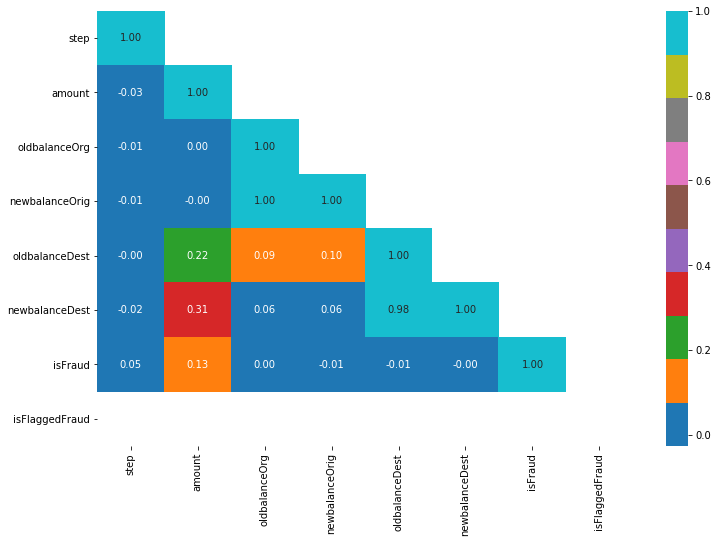

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='tab10',mask=np.triu(df.corr(),+1))
plt.show()

In [13]:
correlations = df.corr()
correlations["isFraud"].sort_values(ascending=False)

isFraud           1.000000
amount            0.128862
step              0.045030
oldbalanceOrg     0.003829
newbalanceDest   -0.000495
oldbalanceDest   -0.007552
newbalanceOrig   -0.009438
isFlaggedFraud         NaN
Name: isFraud, dtype: float64

In [14]:
#creating a copy of original dataset to train and test models

new_df=df.copy()
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### LABEL ENCODING : Converts categorical variables into numerical format.

In [15]:
# Checking how many attributes are dtype: object

objList = new_df.select_dtypes(include = "object").columns
print (objList)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


#### THERE ARE 3 ATTRIBUTES WITH Object Datatype. THUS WE NEED TO LABEL ENCODE THEM IN ORDER TO CHECK MULTICOLINEARITY.

#### MULTICOLLINEARITY : It is a statistical concept where several independent variables in a model are correlated. Multicollineairty among indepedent variables will result in less reliable statistical inferneces.

In [16]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    new_df[feat] = le.fit_transform(new_df[feat].astype(str))

print (new_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  int32  
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  int32  
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  int32  
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 76.0 MB
None


### VARIANCE INFLATION FACTOR : It is a measure of the amount of multicollinearity in regression analysis.

In [17]:
# Import library for VIF (VARIANCE INFLATION FACTOR)

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

calc_vif(new_df)

,variables,VIF
0,step,2.877871
1,type,5.055132
2,amount,2.126342
3,nameOrig,2.857206
4,oldbalanceOrg,709.443407
5,newbalanceOrig,716.622550
6,nameDest,3.823784
7,oldbalanceDest,38.440149
8,newbalanceDest,41.277884
9,isFraud,1.134756


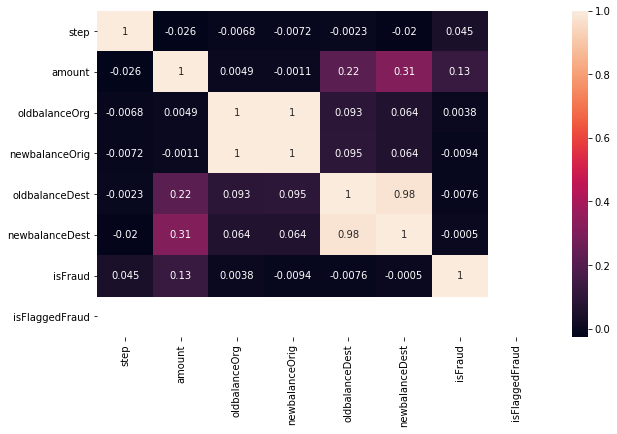

In [18]:
corr=df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

In [19]:
# Tabular representation of correlation 
corr

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,-0.025996,-0.006780,-0.007180,-0.002251,-0.019503,0.045030,NaN
amount,-0.025996,1.000000,0.004864,-0.001133,0.215558,0.311936,0.128862,NaN
oldbalanceOrg,-0.006780,0.004864,1.000000,0.999047,0.093305,0.064049,0.003829,NaN
newbalanceOrig,-0.007180,-0.001133,0.999047,1.000000,0.095182,0.063725,-0.009438,NaN
oldbalanceDest,-0.002251,0.215558,0.093305,0.095182,1.000000,0.978403,-0.007552,NaN
newbalanceDest,-0.019503,0.311936,0.064049,0.063725,0.978403,1.000000,-0.000495,NaN
isFraud,0.045030,0.128862,0.003829,-0.009438,-0.007552,-0.000495,1.000000,NaN
isFlaggedFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#How did you select variables to be included in the model?
#Using the VIF values and correlation heatmap. 
#We just need to check if there are any two attributes highly correlated to each other and then drop the one which is less correlated to the isFraud Attribute.

#### Using the VIF method and Correlation heatmap we can clearly see that oldbalanceDest and newbalanceDest are highly correlated with each other.
#### we can also see that 'amount' variable has the highest correlation with 'isFraud' variable compared to others.

### Analyzing the relation between isFraud and amount variable.

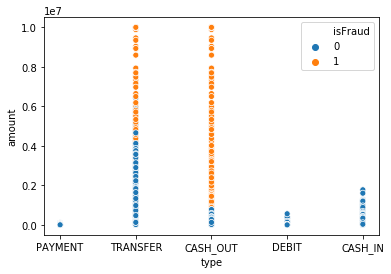

In [21]:
import seaborn as sns
sns.scatterplot(x=df['type'],y=df['amount'],hue=df['isFraud'])
plt.show()

#### Conclusion with the help of Scatterplot :
#### 1. We can clearly see that as the amount increases, the number of fraud transactions also increases.
#### 2. The most number of fraud transactions comes from Transfer and Cash_Out type.

### MODEL BUILDING

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [23]:
#new_df.columns

In [24]:
#new_df = new_df.rename(columns={'amount': 'amount'})

In [25]:
#new_df.columns = new_df.columns.str.strip()

In [26]:
# Perform Scaling
scaler = StandardScaler()
new_df["NormalizedAmount"] = scaler.fit_transform(new_df["amount"].values.reshape(-1, 1))
new_df.drop(["amount"], inplace= True, axis= 1)

Y = new_df["isFraud"]
X = new_df.drop(["isFraud"], axis= 1)

#### Normalizing the complete dataset may lead to decrease in accuracy of model.

### TRAIN-TEST SPLIT

In [27]:
# Split the data
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (734002, 10)
Shape of X_test:  (314573, 10)


### MODEL TRAINING

#### DECISION TREE is a type of supervised machine learning used to categorize or make predictions based on how a previous set of questions were answered.It can be used for regression as well as classification task. Here we are going to use DecisionTreeClassifier as the target variable is categorical, or can be given a specific category such as yes or no. 

In [28]:
# DECISION TREE

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, Y_test) * 100

In [29]:
print("Decision Tree Score: ", decision_tree_score)

Decision Tree Score:  99.95581311809978


#### CONFUSION MATRIX presents a table layout of the different outcomes of the predicition and results of a classification problem and heps visualize its outcomes. It plots a table of all the predicted and actual values of classifier.
##### 1. True Positive : The predicted value is Positive and its Positive.
##### 2. False Positive : Type 1 error - The predicted value is Positive but its False.
##### 3. True Negative : The predicted value is Negative and its Negative.
##### 4. False Negative : Type 2 error - The predicted value is Negative but its Positive.

In [30]:
# key terms of Confusion Matrix for DecisionTree

print("TP,FP,TN,FN - Decision Tree")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_dt).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

TP,FP,TN,FN - Decision Tree
True Positives: 277
False Positives: 67
True Negatives: 314157
False Negatives: 72


In [31]:
# confusion matrix for DecisionTree

confusion_matrix_dt = confusion_matrix(Y_test, Y_pred_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt,)

Confusion Matrix - Decision Tree
[[314157     67]
 [    72    277]]


##### CLASSIFICATION REPORT is a performance evaluation metric and is used to show the precision, recall, F1_Score, and support of your trained classification model.

##### 1. Accuracy: Overall, how often the model correctly predicts fraud and non-fraud transactions.
##### 2. Recall: The proportion of actual fraud transactions that the model correctly identifies (sensitivity or true negative rate).
##### 3. F1 Score: The harmonic mean of precision and recall, which balances between precision and recall.
##### 4. ROC-AUC Score: The area under the receiver operating characteristic curve, which measures the model's ability to distinguish between fraud and non-fraud transactions.

In [32]:
# classification report for DecisionTree
 
classification_report_dt = classification_report(Y_test, Y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)

Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314224
           1       0.81      0.79      0.80       349

    accuracy                           1.00    314573
   macro avg       0.90      0.90      0.90    314573
weighted avg       1.00      1.00      1.00    314573



In [34]:
# AUC ROC for DecisionTree
fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_dt)
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.8967415256920364

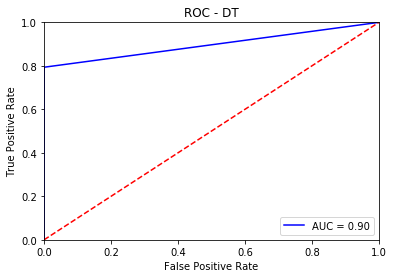

In [35]:
plt.title('ROC - DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Using Decision Tree Classifier we can see the following results:

### 1. ROC_AUC_SCORE : 0.8924
### 2. PRECISION for 1 (isFraud == True) : 0.79
### 3. F1_SCORE : 0.79
### 4. RECALL : 0.79

#### FEATURE IMPORTANCE is used to determine the relative importance of each feature in a dataset when building a predictive model.

In [36]:
# Feature Importance
feature_importance = decision_tree.feature_importances_
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_features = X_train.columns[sorted_indices]

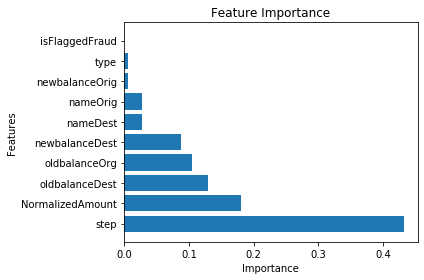

In [37]:
plt.barh(sorted_features, feature_importance[sorted_indices])
plt.title("Feature Importance using Decision Tree")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [38]:
### Now lets make the predictive model using RandomForest.

### RANDOM FOREST is a classifer that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of the dataset. Instead of relying on one decision tree, random forest takes the predicition from each tree and based on the majority votes of predictions, and it predicts the final output.

In [39]:
# RANDOM FOREST

random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, Y_train)

Y_pred_rf = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, Y_test) * 100

In [40]:
print("Random Forest Score: ", random_forest_score)

Random Forest Score:  99.97456870106461


In [41]:
# key terms of Confusion Matrix  for RandomForest

print("TP,FP,TN,FN - Random Forest")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_rf).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

TP,FP,TN,FN - Random Forest
True Positives: 280
False Positives: 11
True Negatives: 314213
False Negatives: 69


In [42]:
# confusion matrix for RandomForest

confusion_matrix_rf = confusion_matrix(Y_test, Y_pred_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Random Forest
[[314213     11]
 [    69    280]]


In [43]:
# classification report for RandomForest

classification_report_rf = classification_report(Y_test, Y_pred_rf)
print("Classification Report - Random Forest")
print(classification_report_rf)

Classification Report - Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314224
           1       0.96      0.80      0.88       349

    accuracy                           1.00    314573
   macro avg       0.98      0.90      0.94    314573
weighted avg       1.00      1.00      1.00    314573



In [45]:
# AUC ROC  for RandomForest
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_rf)
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.901128628368119

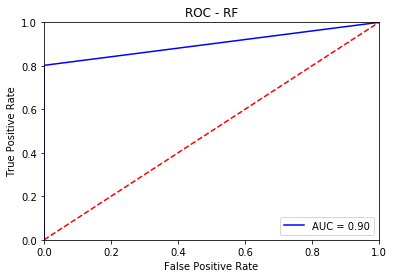

In [46]:
plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Using Random Forest Classifier we can see the following results:

### 1. ROC_AUC_SCORE : 0.9025
### 2. PRECISION for 1 (isFraud == True) : 0.96
### 3. F1_SCORE : 0.88
### 4. RECALL : 0.81

In [48]:
# Feature Importance
feature_importance = random_forest.feature_importances_
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_features = X_train.columns[sorted_indices]

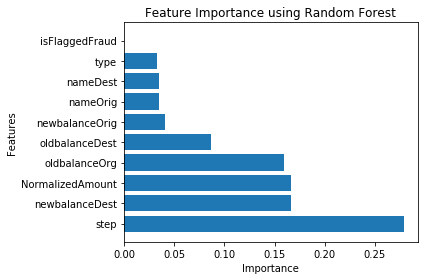

In [49]:
plt.barh(sorted_features, feature_importance[sorted_indices])
plt.title("Feature Importance using Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

## CONCLUSIONS :

#### 1.To solve this categorical problem to develop a model for predicting fraudulent transactions for a financial company, I used Decision Tree Classifier and Random Forest Classifier model.
#### 2. I choose Decision Tree Classifier and Random Forest Classifier as the data is highly imbalanced with a ratio of 99.89 to 00.10.
#### 3. Decision trees and Random forests can be used for Classification as well as Regression tasks. Here I used a classifier as the problem is categorical.
#### 4. When we compare the results from both models, we can see that the Random forest gives better results than the Decision tree.
#### 5. The main reason to use the Random forest model is because of the precision score for isFraud == True, which gives a (0.96) score.
#### 6. When evaluating precision is highly important because rather than predicting normal transactions correctly we want Fraud transactions to be predicted correctly and Legit to be left off.
#### 7. While evaluating the data, there were very few factors that influenced fraudulent transactions. Mostly amount, step. oldbalanceOrg, type which we can see using Correlation values and Correlation heatmap as shown.
#### 8. When checking the relationship between amount and isFraud concerning type using a scatterplot, we can state that as the amount of transaction increased the number of fraud transactions also increased.
#### 9. It also shows that the most number of fraud transactions are from Transfer and Cash_out types.
#### 10. Other variables like newbalanceOrig, oldbalanceorg, and newbalanceDest have almost no influence on the isFraud variable.
#### 11. Prevention that should be adopted while the company updates its infrastructure are : 
#### 11.1. Evaluating the payment method and making it more secure as it is the simplest way to do fraudulent transactions.
#### 11.2. Evaluating the amount of money that is being transferred from customer to merchant and customer to customer. 
#### 11.3. Giving unique code or name to customer and merchant  through which they will do  transactions as it will be easier to identify the individual if they carry out any fraudulent transactions.